In [1]:
import urllib
import requests 
from PIL import Image
from StringIO import StringIO
from BeautifulSoup import BeautifulSoup
from CodeReader import read_code

In [2]:
cookies = {}

{'bg7044': '3|We03z|We03z', 'JSESSIONID': '788327087091F9926E3670EE22A93CAF'}
223 50


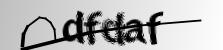

In [3]:
url = 'https://s.nacao.org.cn/servlet/ValidateCode?time='
response = requests.get(url, cookies=cookies)
cookies.update(response.cookies.get_dict())
print cookies
image = Image.open(StringIO(response.content))
print image.width, image.height
image

In [4]:
code = read_code(image)

In [5]:
url = 'https://s.nacao.org.cn/servlet/CheckValidateCode'
data = {'yzm': code}
print data
response = requests.post(url, data=data, cookies=cookies)
cookies.update(response.cookies.get_dict())
print cookies
BeautifulSoup(response.content)

{'yzm': 'dfdaf'}
{'bg7044': '3|We030|We03z', 'JSESSIONID': '788327087091F9926E3670EE22A93CAF'}


{"result":"true"}

In [6]:
name = u'微山县联宇物资贸易有限公司'
nameEncoded = urllib.quote(name.encode('utf-8'))
data = {
    u'firststrfind': u"jgmc='%s'" % nameEncoded,
    u'strfind': u"jgmc='%s'" % nameEncoded, 
    u'key': nameEncoded,
    u'kind': u'2',
    u'tit1': nameEncoded,
    # u'selecttags': u'全国',
    u'selecttags': urllib.quote(u'全国'.encode('utf-8')),
    u'xzqhName': u'alll',
    u'button': u'',
    u'jgdm': u'false',
    u'jgmc': u'true',
    u'zcdz': u'false',
    u'strJgmc': u'',
    u'': u'',
    u'secondSelectFlag': u'',
}
url = 'https://s.nacao.org.cn/servlet/valication' 
response = requests.post(url, data=data, cookies=cookies)
BeautifulSoup(response.content)

[{"currentpage":"","endNum":"","firststrfind":"","intPageCount":"","intRowCount":"","key":"微山县联宇物资贸易有限公司","kind":"2","startNum":"","strfind":"jgmc='微山县联宇物资贸易有限公司'","xzqhName":"alll"},[{"bzjgmcs":"","bzrq":"2017-08-16","entryJgdm":"","jgdm":"MA3FDUP83","jgdz":"山东省济宁市微山县昭阳街道蒋庄村236号","jglx":"企业","jgmc":"微山县联宇物资贸易有限公司","ly":"ZK_N","reservea":"","rowNum":"","tydm":"91370826MA3FDUP83U","zch":"370826200048928","zcrq":"2017-08-16","zfrq":"2032-08-15"}]]